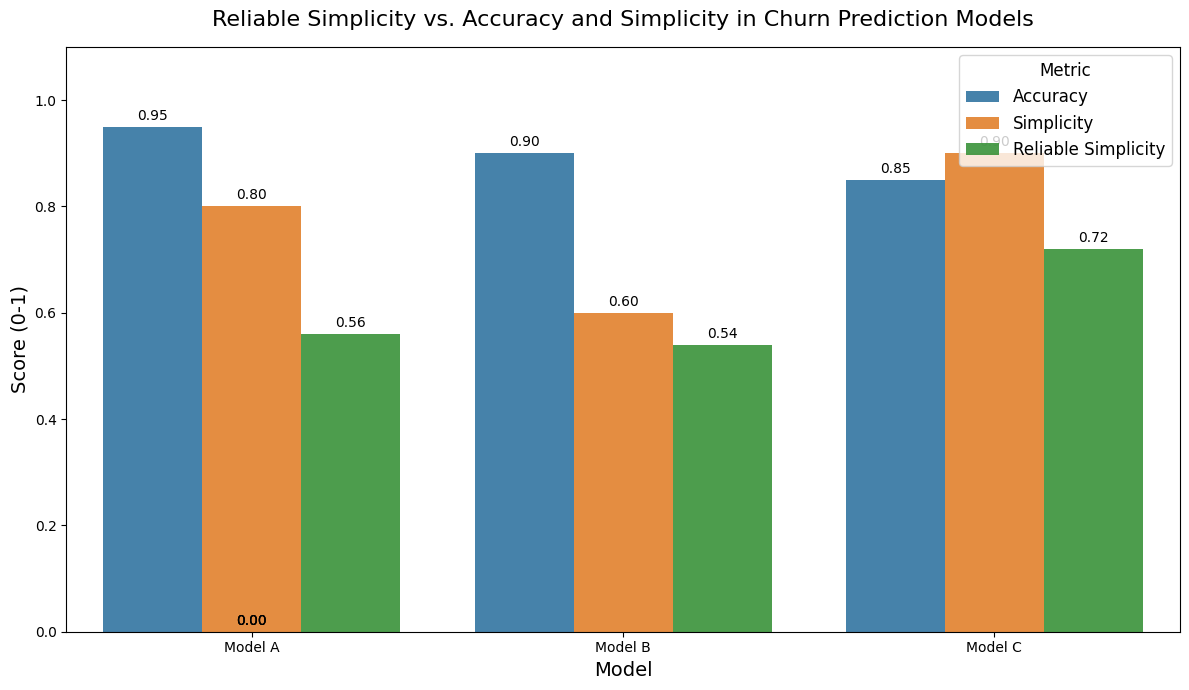

Visualization displayed and saved as 'metric_comparison.png'


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulated data for three churn prediction models
models = ['Model A', 'Model B', 'Model C']
accuracy = [0.95, 0.90, 0.85]  # Model accuracy (e.g., from LSTM predictions)
simplicity = [0.8, 0.6, 0.9]   # Simplicity: 1 - (num_key_features / total_features)
reliability = [0.7, 0.9, 0.8]   # Reliability: consistency of explanations (e.g., 1 - SHAP variance)
reliable_simplicity = [s * r for s, r in zip(simplicity, reliability)]  # Composite score: simplicity * reliability

# Prepare data for visualization
data = pd.DataFrame({
    'Model': models * 3,
    'Metric': ['Accuracy'] * 3 + ['Simplicity'] * 3 + ['Reliable Simplicity'] * 3,
    'Score': accuracy + simplicity + reliable_simplicity
})

# Create bar chart with enhanced styling
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=data,
                 palette=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.9)
plt.title('Reliable Simplicity vs. Accuracy and Simplicity in Churn Prediction Models',
          fontsize=16, pad=15)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score (0-1)', fontsize=14)
plt.legend(title='Metric', fontsize=12, title_fontsize=12)
plt.ylim(0, 1.1)

# Add value annotations on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.savefig('metric_comparison.png', dpi=300)  # Save for reference
plt.show()  # Display the plot interactively
print("Visualization displayed and saved as 'metric_comparison.png'")